# Projeto de Insight

### Contexto: 
 #### House Rocket é uma plataforma digital que tem como modelo de negócio, a compra e a venda de imóveis usando tecnologia.

 #### Você é um Data Scientist contrato pela empresa para ajudar a encontrar as melhores oportunidades de negócio no mercado de imóveis. O CEO da House Rocket gostaria de maximizar a receita da empresa encontrando boas oportunidades de negócio.

 #### Sua principal estratégia é comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos. Quanto maior a diferença entre a compra e a venda, maior o lucro da empresa e portanto maior sua receita.

 #### Entretanto, as casas possuem muitos atributos que as tornam mais ou menos atrativas aos compradores e vendedores e a localização e o período do ano também podem influenciar os preços.
 
 
 ## Objetivo do Projeto
 #### O objetivo do projeto é responder as seguintes perguntas principais:
 
#### 1 - Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?
####  2- Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?
#### 3-  House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?

### Atributos disponíveis e o que significam estão no link a seguir
### https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

In [126]:
# Iniciando a leitura do conjunto de dados
import pandas as pd
from datetime import datetime
df = pd.read_csv('House_Prices\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [127]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [128]:
# Olhando como estão os dados
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Veja que é necessário um tratamento dos dados:
 #### Tipo data deve ser corrigido para date


In [129]:
# Checando se há valores ausentes
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [130]:
# Tratando colunas de dados com banheiro(arredondando valores)
truncar_valores = []
for valor in df.bathrooms:
    if round(valor) - valor > 0.5:
        truncar_valores.append(round(valor) + 1)
    elif round(valor)==0:
        truncar_valores.append(1)
    else:
        truncar_valores.append(round(valor))

In [131]:
df.bathrooms = truncar_valores
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,1,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [132]:
# 1) pegando tipo de datas por meio de quebra de splits
lista_datas = []
for data in df.date:
    lista_datas.append(data.split("T")[0])
# 2) formatando tipo de dados para data
# Cada data é padrão então temos uma string padronizada em cada elemento
# Logo segue que é necessário formatar apenas para uma e isso se replica para todas
def formata_datas(data):   
    return data[0:4] + "-" + data[4:6] + "-" + data[6:8]

datas_formatadas = []
for datas in lista_datas:
    datas_formatadas.append(formata_datas(datas))

In [133]:
df.date = pd.to_datetime(datas_formatadas)

In [134]:
df.date

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

###  Tendo assim formatado os dados para o tipo correto iremos iniciar a análise exploratória dos dados

In [135]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.059362,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.754186,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,1.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,2.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [136]:
df.min()

id                           1000102
date             2014-05-02 00:00:00
price                        75000.0
bedrooms                           0
bathrooms                          1
sqft_living                      290
sqft_lot                         520
floors                           1.0
waterfront                         0
view                               0
condition                          1
grade                              1
sqft_above                       290
sqft_basement                      0
yr_built                        1900
yr_renovated                       0
zipcode                        98001
lat                          47.1559
long                        -122.519
sqft_living15                    399
sqft_lot15                       651
dtype: object

In [137]:
df.max()

id                        9900000190
date             2015-05-27 00:00:00
price                      7700000.0
bedrooms                          33
bathrooms                          8
sqft_living                    13540
sqft_lot                     1651359
floors                           3.5
waterfront                         1
view                               4
condition                          5
grade                             13
sqft_above                      9410
sqft_basement                   4820
yr_built                        2015
yr_renovated                    2015
zipcode                        98199
lat                          47.7776
long                        -121.315
sqft_living15                   6210
sqft_lot15                    871200
dtype: object

## Buscando a resposta para a primeira pergunta
### Pode-se por exemplo avaliar como o preços se comportam em relação aos fatores data, numero de quartos e banheiros etc.

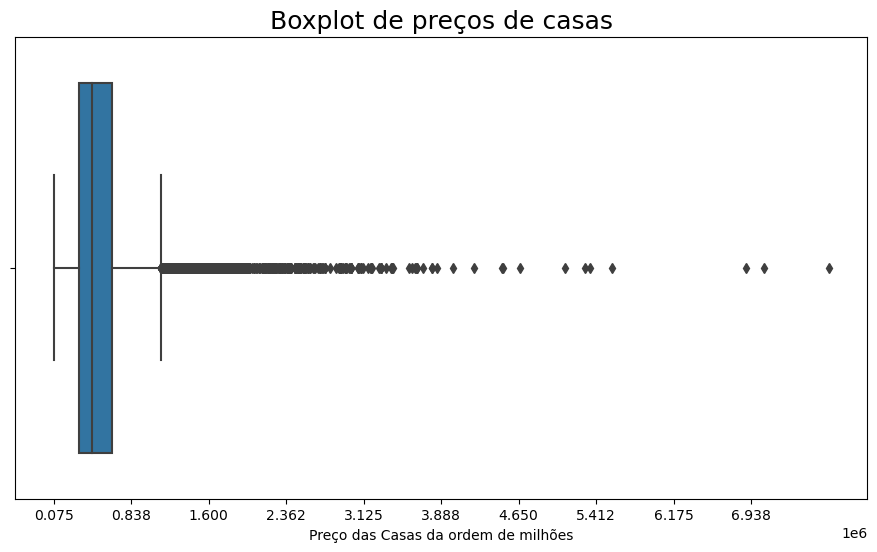

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize =(11, 6))
dados = df.price.values
#Plotando o boxplot das espécies em relação ao tamanho das sépalas
# Ajustando a escala
minimo = df.price.min()
maximo = df.price.max()
passos = (maximo - minimo)/10
# Adicionando Título ao gráfico
bplots = sns.boxplot(x = dados)
plt.title("Boxplot de preços de casas", loc="center", fontsize=18) 
plt.xlabel("Preço das Casas da ordem de milhões")
plt.xticks(np.arange(minimo,maximo, passos))
plt.show()

In [139]:
#tomando como medida o limite superior
IQR = df.price.quantile(0.75) - df.price.quantile(0.25)
LS = df.price.quantile(0.75) + (1.5 *IQR)
LS

outliers = df[df['price']>LS]
outliers

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,2014-05-12,1225000.0,4,4,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
21,2524049179,2014-08-26,2000000.0,3,3,3050,44867,1.0,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
49,822039084,2015-03-11,1350000.0,3,2,2753,65005,1.0,1,2,...,9,2165,588,1953,0,98070,47.4041,-122.451,2680,72513
69,1802000060,2014-06-12,1325000.0,5,2,3200,20158,1.0,0,0,...,8,1600,1600,1965,0,98004,47.6303,-122.215,3390,20158
125,4389200955,2015-03-02,1450000.0,4,3,2750,17789,1.5,0,0,...,8,1980,770,1914,1992,98004,47.6141,-122.212,3060,11275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21568,524059330,2015-01-30,1700000.0,4,4,3830,8963,2.0,0,0,...,10,3120,710,2014,0,98004,47.5990,-122.197,2190,10777
21576,9253900271,2015-01-07,3567000.0,5,4,4850,10584,2.0,1,4,...,10,3540,1310,2007,0,98008,47.5943,-122.110,3470,18270
21590,7430200100,2014-05-14,1222500.0,4,4,4910,9444,1.5,0,0,...,11,3110,1800,2007,0,98074,47.6502,-122.066,4560,11063
21597,191100405,2015-04-21,1575000.0,4,3,3410,10125,2.0,0,0,...,10,3410,0,2007,0,98040,47.5653,-122.223,2290,10125


In [140]:
outliers.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.146000e+03,1.146000e+03,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000
mean,4.170926e+09,1.667087e+06,4.104712,3.207679,3943.389180,23975.275742,1.820681,0.089005,1.335079,3.464223,9.912740,3218.218150,725.171030,1974.472077,258.016579,98066.938918,47.616567,-122.225166,3134.870855,18507.986911
std,2.832425e+09,6.523358e+05,0.928649,1.008511,1233.067707,59535.470266,0.485960,0.284876,1.568614,0.708669,1.182579,1152.299771,712.649108,32.765271,670.317202,55.302390,0.058931,0.108148,845.057150,38054.596107
min,3.100016e+07,1.130000e+06,0.000000,1.000000,1560.000000,609.000000,1.000000,0.000000,0.000000,1.000000,6.000000,1040.000000,0.000000,1900.000000,0.000000,98004.000000,47.329300,-122.451000,1100.000000,1224.000000
25%,1.700692e+09,1.260125e+06,4.000000,2.000000,3120.000000,7226.750000,1.500000,0.000000,0.000000,3.000000,9.000000,2352.500000,0.000000,1951.000000,0.000000,98008.000000,47.575850,-122.289000,2552.500000,6854.000000
50%,3.628845e+09,1.450000e+06,4.000000,3.000000,3790.000000,11495.500000,2.000000,0.000000,0.000000,3.000000,10.000000,3060.000000,700.000000,1985.000000,0.000000,98040.000000,47.626300,-122.225000,3055.000000,11056.500000
75%,6.562150e+09,1.813750e+06,5.000000,4.000000,4487.500000,19438.250000,2.000000,0.000000,3.000000,4.000000,11.000000,3920.000000,1200.000000,2003.000000,0.000000,98112.000000,47.648150,-122.183000,3717.500000,17592.250000
max,9.831201e+09,7.700000e+06,10.000000,8.000000,13540.000000,920423.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.773500,-121.756000,6210.000000,858132.000000


### Vamos analisar o que leva ao preço de venda dessas casas a ser elevados

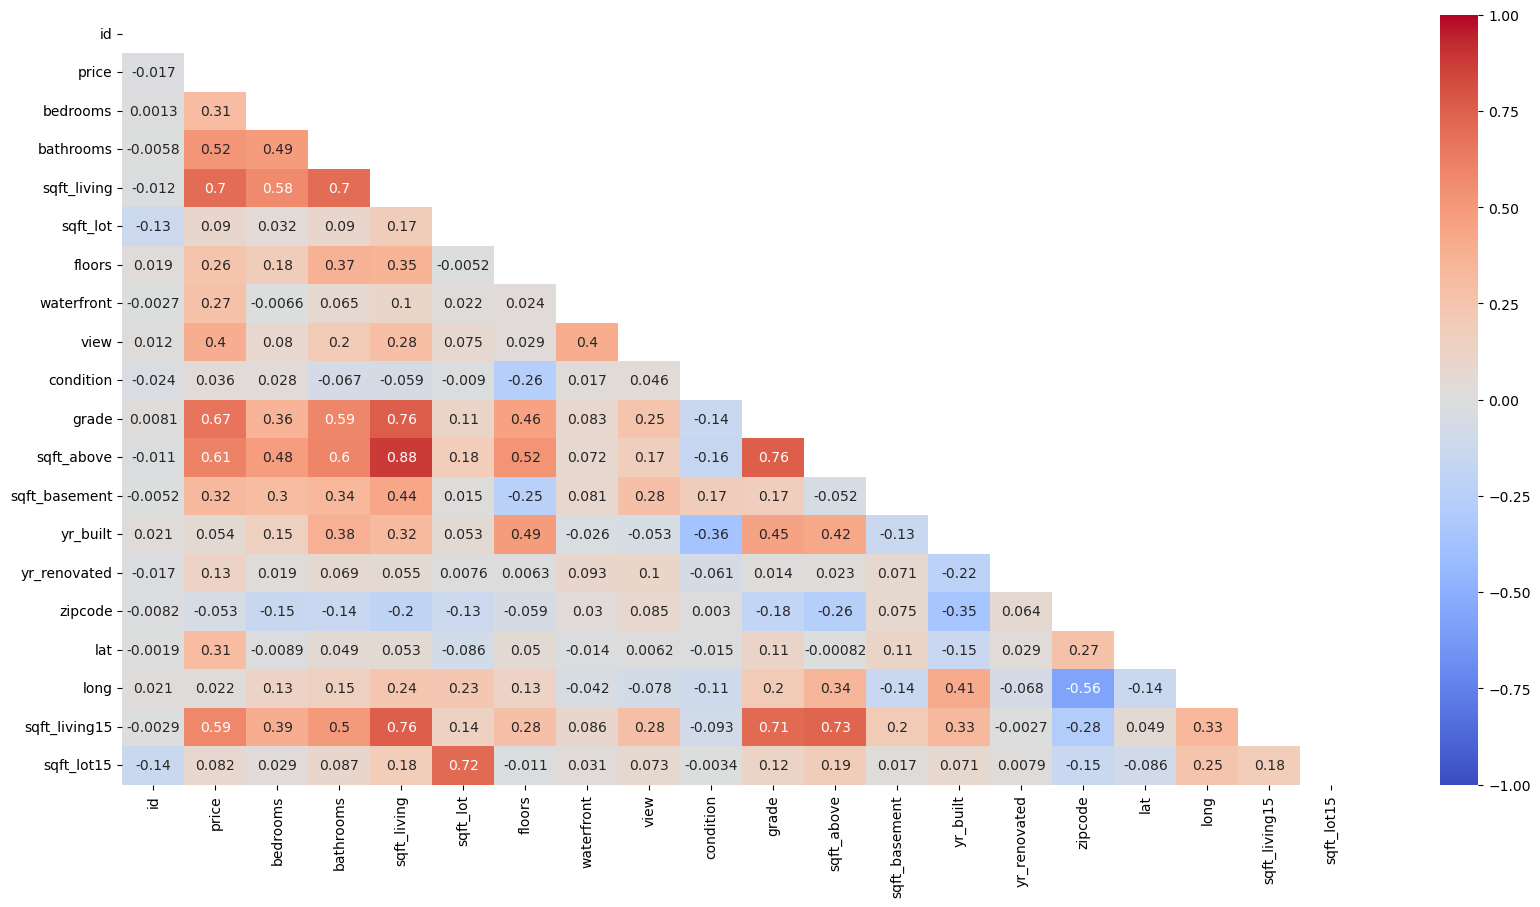

In [141]:
plt.figure(figsize =(20, 10))
upp_mat = np.triu(df.corr())
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat)
plt.show()

#### Veja que pode existir uma correlação forte em se o coefiente positivo tem valor >=0.70 e negativa se valor <= - 0.7

### Note que existe um relação entre as seguinte variáveis

#### price - sqft_living /  sqft_living - bathrooms / grade -sqft_living / sft_above - sqft_living / sqft_above - grade / 
####  sqft-living - sqft_living15 /   sqft_living15 - grade /  sqft_living15 -  sqft-above / sqft_lot -  sqft_lot15

In [142]:
# Vejamos uma análise entre essas variáveis
def function_scatter(x_col,y_col,df):
    plt.figure(figsize =(20, 20))
    plt.scatter(x= x_col,y=y_col,data=df) 
    plt.xlabel(x_col) 
    plt.ylabel(y_col)

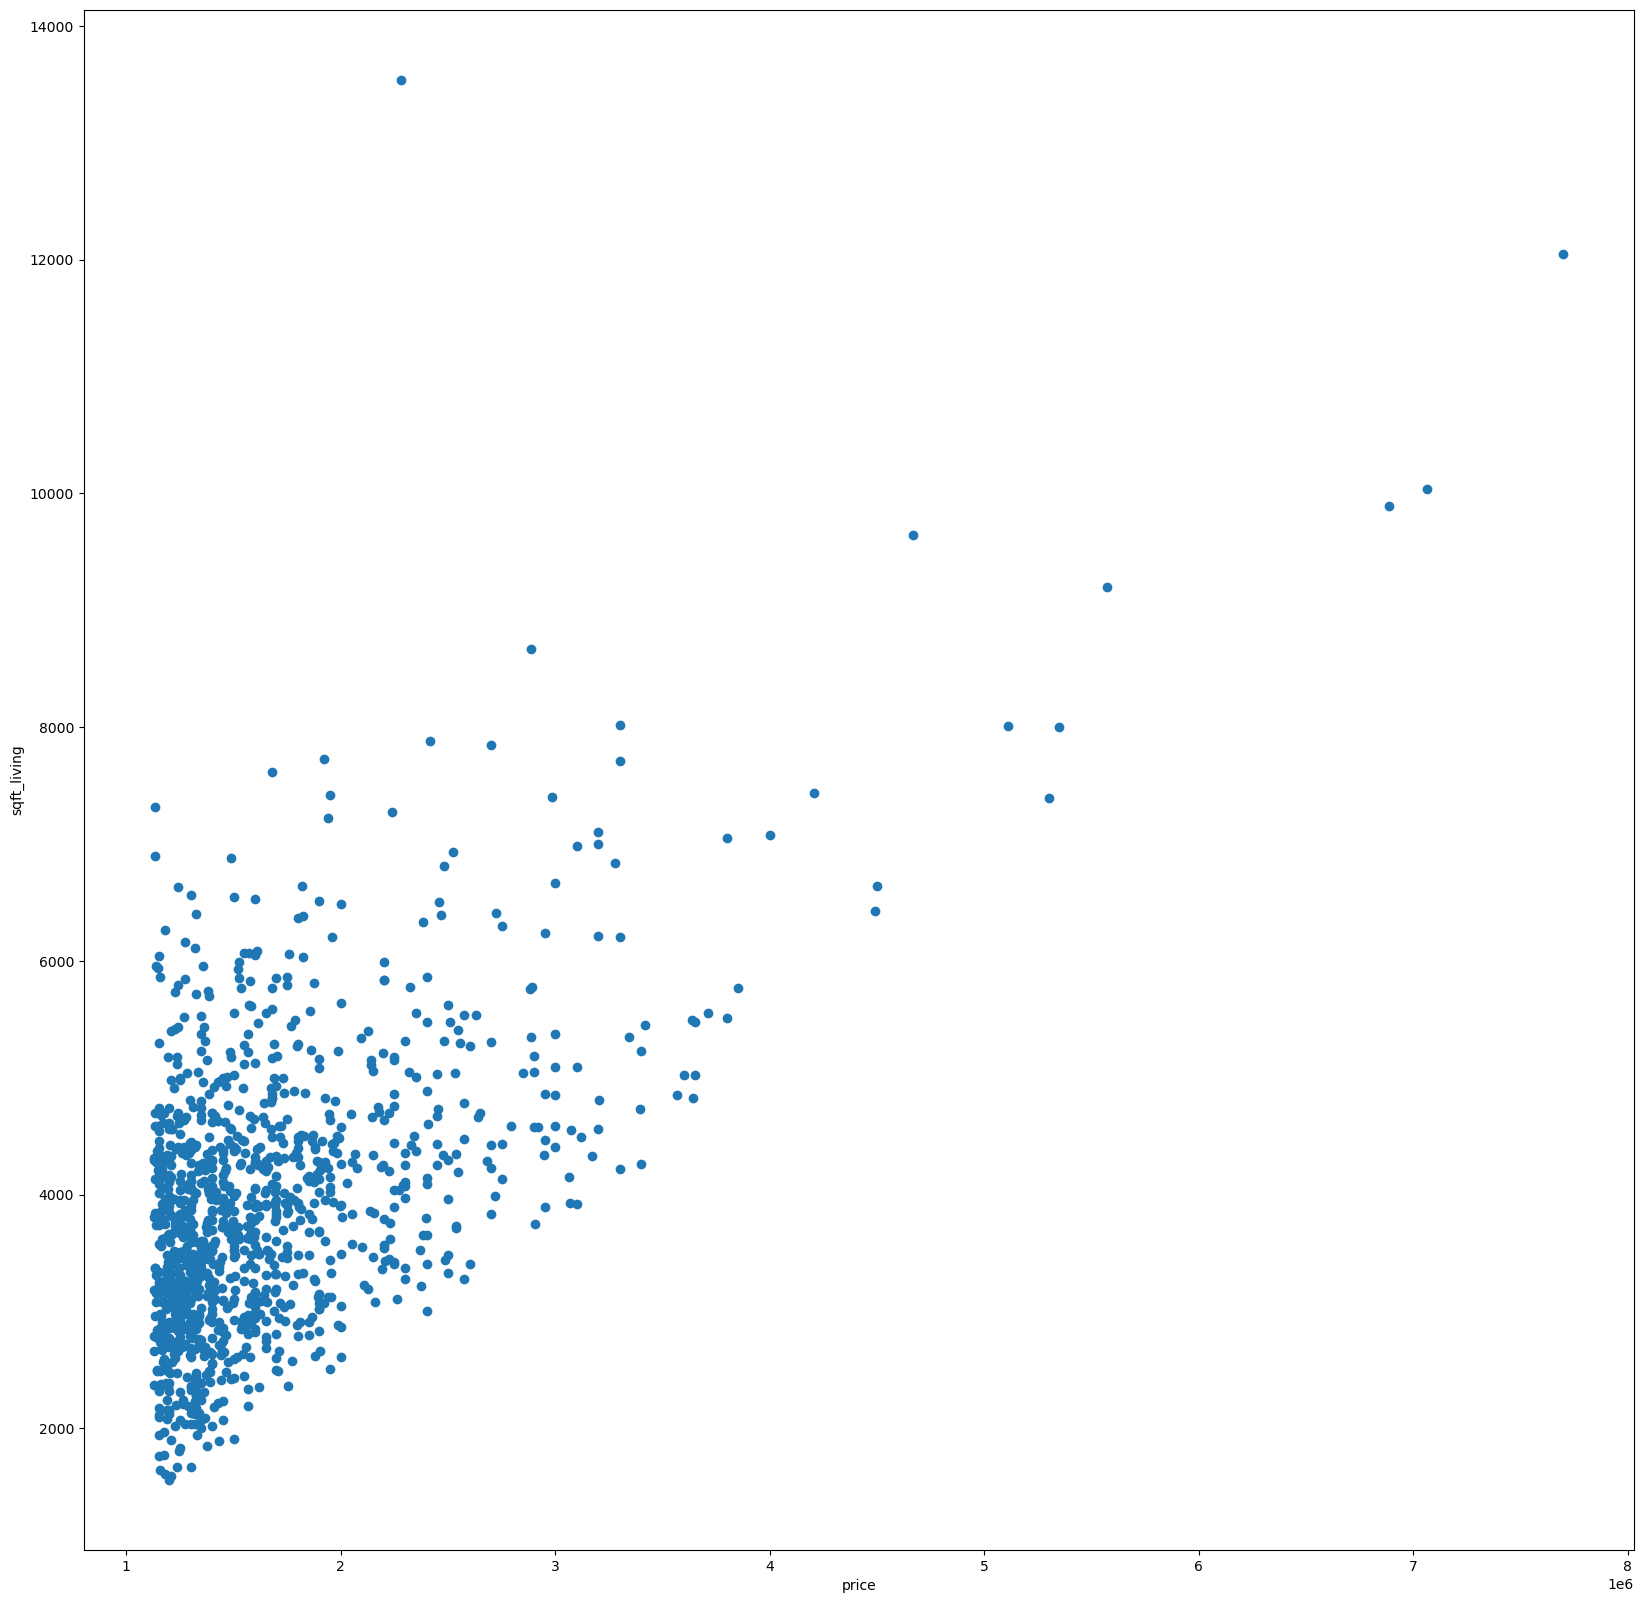

In [143]:
function_scatter('price','sqft_living',outliers)

### Veja que a relação de preço com metro quadrado se concentra entre 2000 - 6000 metros quadrados

É possível que existam casas entre essa faixa de metros quadrados que não estão com o preço acima do normal, mas que possam ser vendidas com tal.

In [144]:
df.query("6000> sqft_living > 2000")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5,7237550310,2014-05-12,1225000.0,4,4,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
10,1736800520,2015-04-03,662500.0,3,2,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
15,9297300055,2015-01-24,650000.0,4,3,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
21,2524049179,2014-08-26,2000000.0,3,3,3050,44867,1.0,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21600,249000205,2014-10-15,1537000.0,5,4,4470,8088,2.0,0,0,...,11,4470,0,2008,0,98004,47.6321,-122.200,2780,8964
21603,7852140040,2014-08-25,507250.0,3,2,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21605,3448900210,2014-10-14,610685.0,4,2,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,2015-03-26,1007500.0,4,4,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200


### De fato existem tais casas o que significa que possas haver outros fatores que como tempo ou medida  de localização que levam a casa a se valorizam

In [145]:
# Podemos ver pela quantidade se características como a frequência de determinados elementos
# podem ou não ser uma boa mética para dizermos que o preço é elevado em determinada região
outliers.waterfront.value_counts()

0    1044
1     102
Name: waterfront, dtype: int64

#### Vejamos que fatores levam a casas serem vendidas acima do preço médio e que porém possuem a mesma classificação

In [146]:
# Para verificar tal relação veja que existem classificações equivalentes nos outliers que tem nas casas normais
dict(outliers.grade.value_counts())

{10: 366, 9: 289, 11: 260, 8: 120, 12: 85, 13: 13, 7: 12, 6: 1}

In [147]:
# Conjunto de todas as casas
dict(df.grade.value_counts())

{7: 8981,
 8: 6068,
 9: 2615,
 6: 2038,
 10: 1134,
 11: 399,
 5: 242,
 12: 90,
 4: 29,
 13: 13,
 3: 3,
 1: 1}

In [148]:
# Quantidade de casas que não foram vendidas a preço mais alto que a média
df.grade.value_counts() - outliers.grade.value_counts()

1        NaN
3        NaN
4        NaN
5        NaN
6     2037.0
7     8969.0
8     5948.0
9     2326.0
10     768.0
11     139.0
12       5.0
13       0.0
Name: grade, dtype: float64

In [149]:
# Checando conjunto de varíaveis dentro do padrão de preço comum
normal = df[df['price']<LS]
normal

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,1,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [150]:
normal.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.046700e+04,2.046700e+04,20467.000000,20467.000000,20467.000000,2.046700e+04,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000
mean,4.603223e+09,4.769846e+05,3.329750,1.995065,1975.558167,1.461041e+04,1.476035,0.002980,0.172668,3.406361,7.530561,1708.330972,267.227195,1970.811013,74.681145,98078.555773,47.556888,-122.213265,1922.255191,12447.084526
std,2.877364e+09,2.083713e+05,0.912885,0.682475,774.833460,4.010956e+04,0.537033,0.054513,0.640950,0.647228,1.039192,727.296461,409.031661,29.160540,378.761647,53.336953,0.141038,0.142412,614.932010,26538.592250
min,1.000102e+06,7.500000e+04,0.000000,1.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.131701e+09,3.150000e+05,3.000000,2.000000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1951.000000,0.000000,98033.000000,47.460400,-122.330000,1470.000000,5046.000000
50%,3.905082e+09,4.375000e+05,3.000000,2.000000,1860.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1974.000000,0.000000,98065.000000,47.567000,-122.232000,1800.000000,7542.000000
75%,7.338101e+09,6.000000e+05,4.000000,2.000000,2431.000000,1.031900e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2100.000000,510.000000,1996.000000,0.000000,98118.000000,47.679800,-122.123000,2280.000000,9883.500000
max,9.900000e+09,1.127500e+06,33.000000,8.000000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5710.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5380.000000,871200.000000


#### O que realmente faz sentido nesse caso é procurar características que validem o preço de compra de um imóvel de tal modo que o CEO possa comprar imóveis mais baratos e identificar oportunidades para conseguir vendê-los a preço mais alto que o de compra no momento certo.

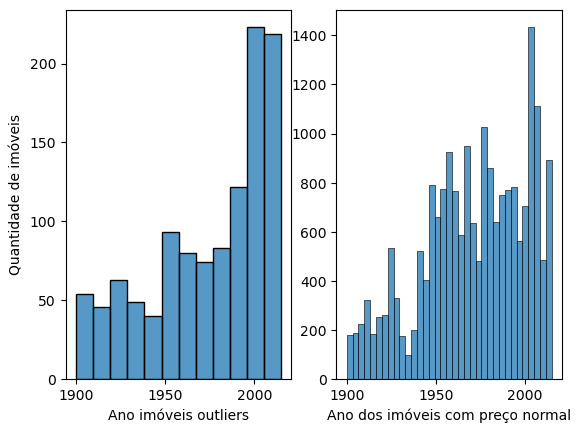

In [151]:
# Gráfico do ano de imóveis e suas quantidades
plt.subplot(1, 2, 1)
sns.histplot(outliers.yr_built)
plt.xlabel('Ano imóveis outliers')
plt.ylabel('Quantidade de imóveis')
#plot 2:
plt.subplot(1, 2, 2)
sns.histplot(normal.yr_built)
plt.xlabel('Ano dos imóveis com preço normal')
plt.ylabel('')
plt.show()

In [152]:
outliers.yr_built.value_counts()

2014    47
2006    45
2008    42
2007    37
2001    34
        ..
1934     2
1919     1
1932     1
1901     1
1904     1
Name: yr_built, Length: 111, dtype: int64

Uma característica que se pode tomar como base o quão o imóvel é novo, já que a concentração de imóveis fora do padrão de preço
são em grande maioria "mais recentes"( ano de 2000 para cima).

#### Podemos checar a  quantidade de imóveis por metragem comparando sempre com os outliers(já sabemos que pela correlação ela influencia), mas vejamos graficamente

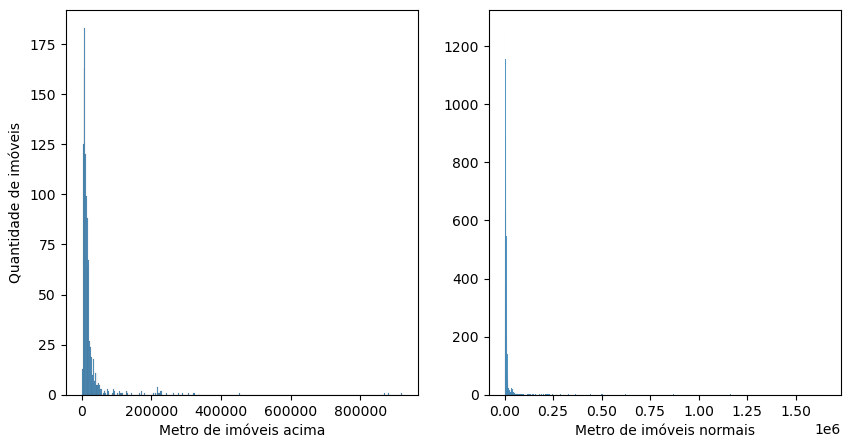

In [153]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.histplot(outliers.sqft_lot)
plt.xlabel('Metro de imóveis acima')
plt.ylabel('Quantidade de imóveis')
#plot 2:
plt.subplot(1, 2, 2)
sns.histplot(normal.sqft_lot)
plt.xlabel('Metro de imóveis normais')
plt.ylabel('')
plt.show()

#### Isso nos diz que a grande maioria dos imóveis acima do preço está entre uma faixa de 0-200000 metros quadrados e além disso são mais recentes

In [154]:
imovel_bom = normal[normal.sqft_lot <=200000]

In [155]:
imovel_bom = imovel_bom[imovel_bom.yr_built > 2000]

In [156]:
imovel_bom

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9,3793500160,2015-03-12,323000.0,3,2,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
29,1873100390,2015-03-02,719000.0,4,2,2570,7173,2.0,0,0,...,8,2570,0,2005,0,98052,47.7073,-122.110,2630,6026
30,8562750320,2014-11-10,580500.0,3,2,2320,3980,2.0,0,0,...,8,2320,0,2003,0,98027,47.5391,-122.070,2580,3980
31,2426039314,2014-12-01,280000.0,2,2,1190,1265,3.0,0,0,...,7,1190,0,2005,0,98133,47.7274,-122.357,1390,1756
42,7203220400,2014-07-07,861990.0,5,3,3595,5639,2.0,0,0,...,9,3595,0,2014,0,98053,47.6848,-122.016,3625,5639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,1,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


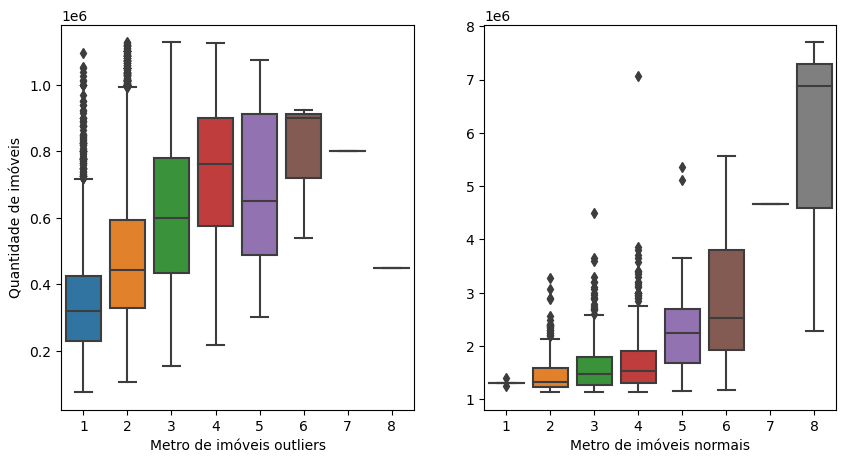

In [157]:
# Preço de imóveis por categoria
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
sns.boxplot(x = normal.bathrooms, y = normal.price)
plt.xlabel('Metro de imóveis outliers')
plt.ylabel('Quantidade de imóveis')
#plot 2:
plt.subplot(1, 2, 2)
sns.boxplot(x = outliers.bathrooms, y = outliers.price)
plt.xlabel('Metro de imóveis normais')
plt.ylabel('')
plt.show()


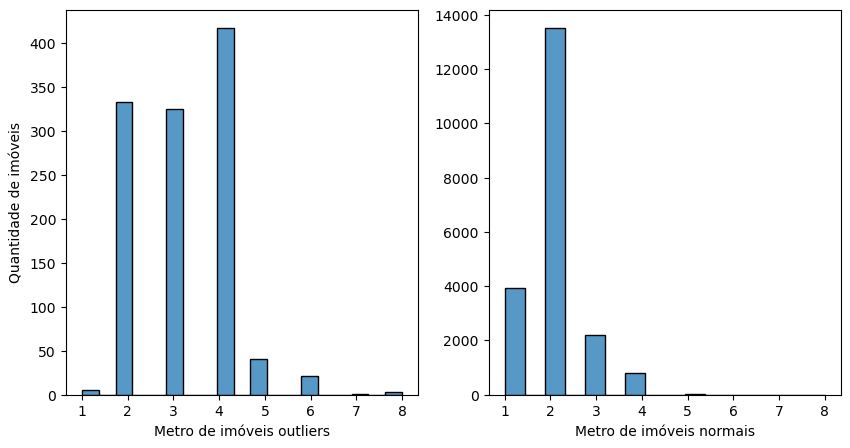

In [158]:
# Preço de imóveis por categoria
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
sns.histplot(outliers.bathrooms)
plt.xlabel('Metro de imóveis outliers')
plt.ylabel('Quantidade de imóveis')
#plot 2:
plt.subplot(1, 2, 2)
sns.histplot(normal.bathrooms)
plt.xlabel('Metro de imóveis normais')
plt.ylabel('')
plt.show()

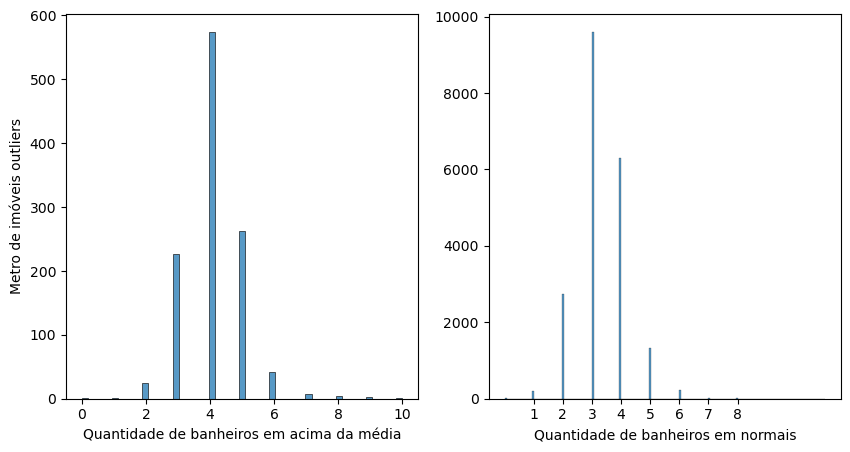

In [159]:
normal = normal[normal.bedrooms!=33]
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
sns.histplot(outliers.bedrooms)
plt.xlabel('Quantidade de banheiros em acima da média')
plt.ylabel('Metro de imóveis outliers')
#plot 2:
plt.subplot(1, 2, 2)
sns.histplot(normal.bedrooms)
plt.xlabel('Quantidade de banheiros em normais')
plt.ylabel('')
plt.xticks(np.array([1,2,3,4,5,6,7,8]))
plt.show()
# Especificamente para esse gráfico irei retirar o valor outliers de 33 banheiros pois ele está puxando a escala do gráfico
# de padrões "normais" o deixando desproporcional



In [160]:
# Retornando ao valor original
normal = df[df.price<LS]

### Isso quer dizer que imóveis com banheiros entre 2 a 4  e com quartos entre 3 e 5 de são bons para um bom preço de venda

In [161]:
imovel_bom = imovel_bom.query(' 1< bathrooms < 5 and 2< bedrooms< 6')

In [162]:
imovel_bom

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9,3793500160,2015-03-12,323000.0,3,2,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
29,1873100390,2015-03-02,719000.0,4,2,2570,7173,2.0,0,0,...,8,2570,0,2005,0,98052,47.7073,-122.110,2630,6026
30,8562750320,2014-11-10,580500.0,3,2,2320,3980,2.0,0,0,...,8,2320,0,2003,0,98027,47.5391,-122.070,2580,3980
42,7203220400,2014-07-07,861990.0,5,3,3595,5639,2.0,0,0,...,9,3595,0,2014,0,98053,47.6848,-122.016,3625,5639
45,8035350320,2014-07-18,488000.0,3,2,3160,13603,2.0,0,0,...,8,3160,0,2003,0,98019,47.7443,-121.977,3050,9232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21606,7936000429,2015-03-26,1007500.0,4,4,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,2015-02-19,475000.0,3,2,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,2014-05-21,360000.0,3,2,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200


##### Assim baseando numa mediana de preços de bons imóveis normais e numa mediana de preço do conjunto de preços acima da média, podemos estimar um lucro aproximado de venda desses imóveis com essas características:
#### Calculando : [ MEDIANA(OUTLIERS) - MEDIANA(IMOVEL_BOM) ] x Quantidade de imóveis bons
 #### -> Em torno de 200.000 metros, com 2 a 4 banheiros e 3 a 5 quartos ,  tomando nos anos mais recentes de 2000 para cima

In [163]:
print("LUCRO ESTIMADO DE IMÓVEIS >>>>> ",(outliers.price.quantile(0.5) - imovel_bom.price.quantile(0.5))*len(imovel_bom))

LUCRO ESTIMADO DE IMÓVEIS >>>>>  3433111500.0


### Conclusão da pergunta 1

Agora veja que isso é um valor bem alto para ainda mais considerando que a aquisição de um imóvel é um processo que demora
de 1 a 3 meses dependendo de documentações e outros fatores, é plausível tomar por exemplo uma parte média desse valor, por exemplo, dos 3593 imóveis que dão R$ 3.433.111.500 se pegarmos em torno 1 % desse valor teremos em média um valor de com um valor próximo de 35 imóveis, um total de 34.331.115 reais em média( O que é um lucro considerável baseado nas estimativas anteriores)

## Respondendo a pergunta 2: Qual o melhor momento para preço de compra de um imóvel?

#### Podemos analisar a localização dos imóveis e ver qual a região mais propícia a se ter vendas mais altas e além disso, observar em que momento essa região tem propensão a venda a um preço acima do valor padrão

In [164]:
import geopandas as gpd

In [165]:
gpd.datasets.get_path("nybb")
df_geo = gpd.read_file("House_Prices\kc_house_data.csv")

In [166]:
df_geo= df_geo[['lat','long']]

In [167]:
# A ideia nesse ponto é mapear as áreas que mais vendem e usá-las como um referencial de vendas para conseguir
# achar as melhores regioes de venda.
# Retirando o mapa gráfico com as coordenadas da região de king county terei de transformar os dados para um objetos pandas

In [168]:
# Serializando o objetoHouse_Prices\Parcel2010.geojson")
geo_data = gpd.read_file(r'C:\Users\UserName\OneDrive\Documentos\Intro to Data Science\Portifólio\Data Insight\kc_region\2010_Census_Tracts_for_King_County_-_Conflated_to_Parcels___tracts10_area.shp')

In [169]:
# Podemos pensar em varíaveis temporais que levaram o preço das casas a serem elevados, observando o período de venda
# em que o conjunto normal e outliers foram vendidos em analisando os períodos mais proprícios que elevam o preço das casas

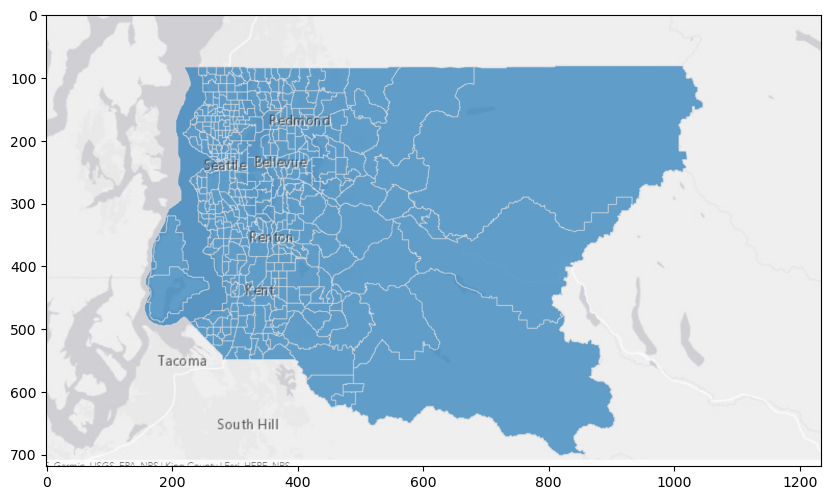

In [170]:
# Plotando região de king county
import matplotlib.image as img
plt.figure(figsize =(10, 10))
image = img.imread('House_Prices\king_county.png')
plt.imshow(image)
plt.show()

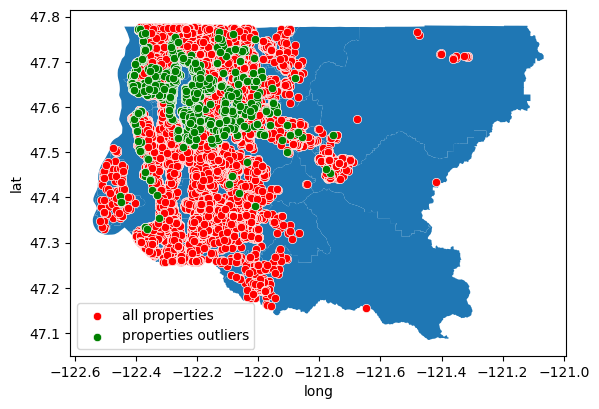

In [171]:
# Gráfico da região de king county junto ao mapeamento das casas na mesma
geo_data.plot()
df_dados = df[['lat','long']]
sns.scatterplot(x= df_dados.long  ,y=df_dados.lat , color = 'red', label = 'all properties')
sns.scatterplot(x= outliers.long, y = outliers.lat, color = 'green', label = 'properties outliers')
plt.show()

#### Baseado nesses dados de região e na figura acima vemos que existe uma predominância de preços contrados nas casas na região de Seattle, Bellevue e Redmond

C:\Users\Username\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


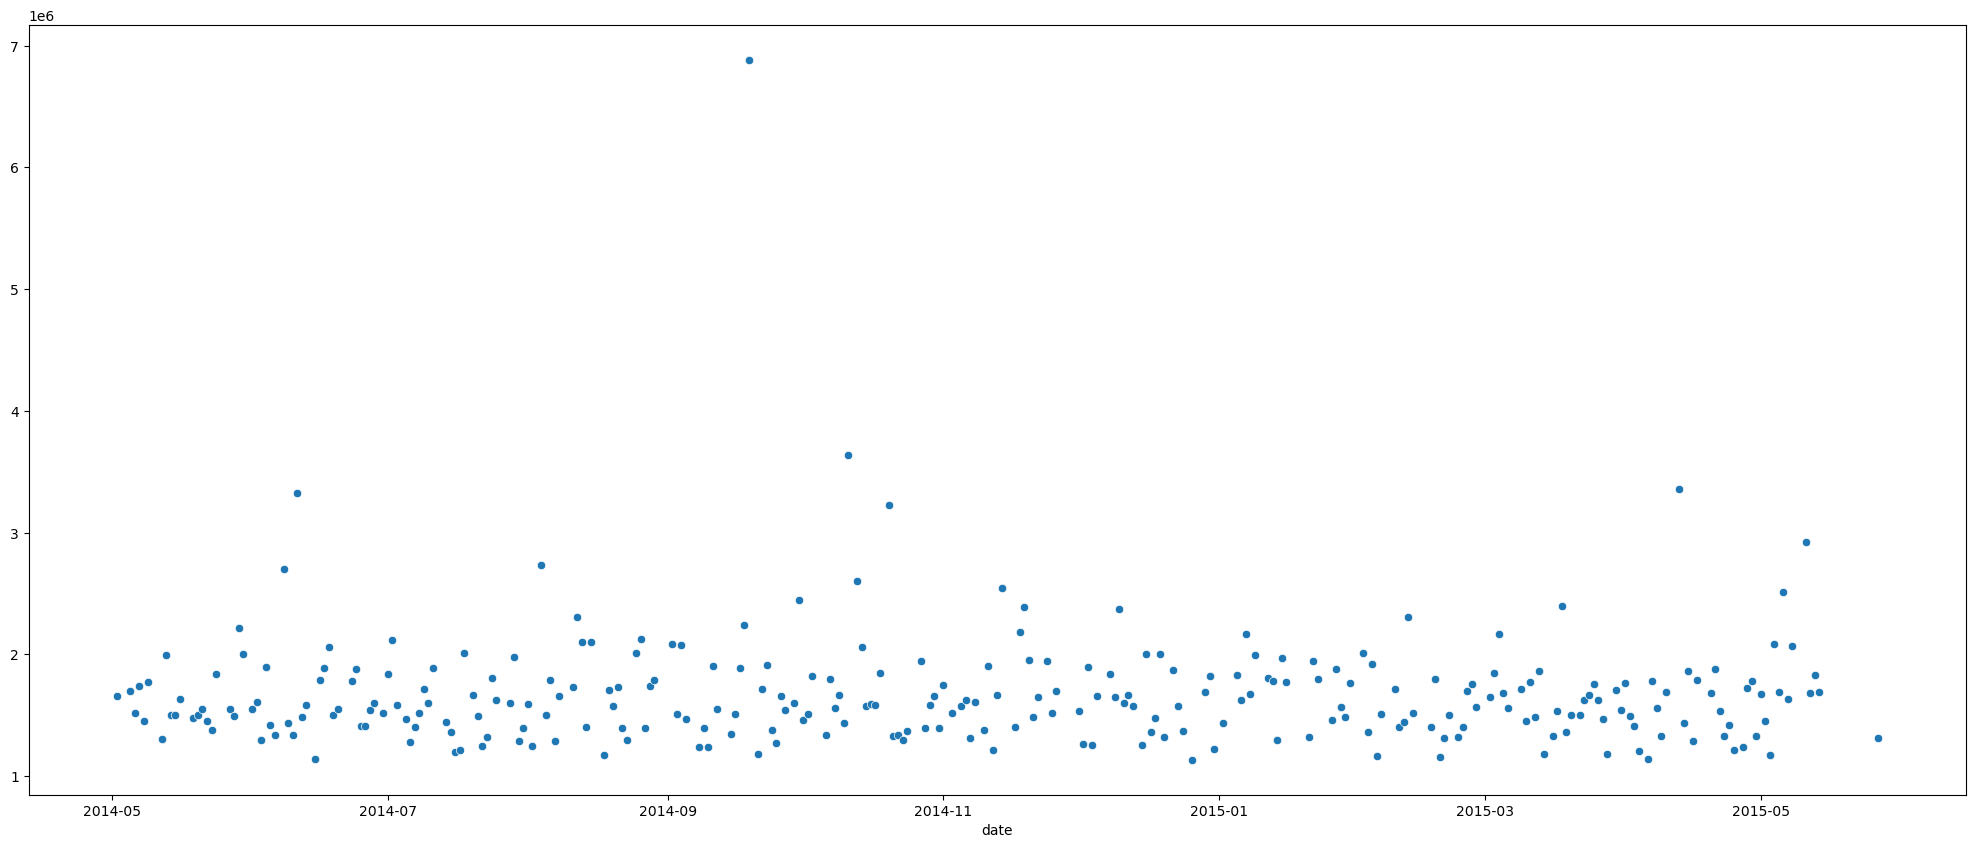

In [172]:
x = outliers.groupby(["date"]).mean().index
y = outliers.groupby(["date"]).mean().price.values
plt.figure(figsize=(25,10))
sns.scatterplot(x, y)
plt.show()

C:\Users\Username\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


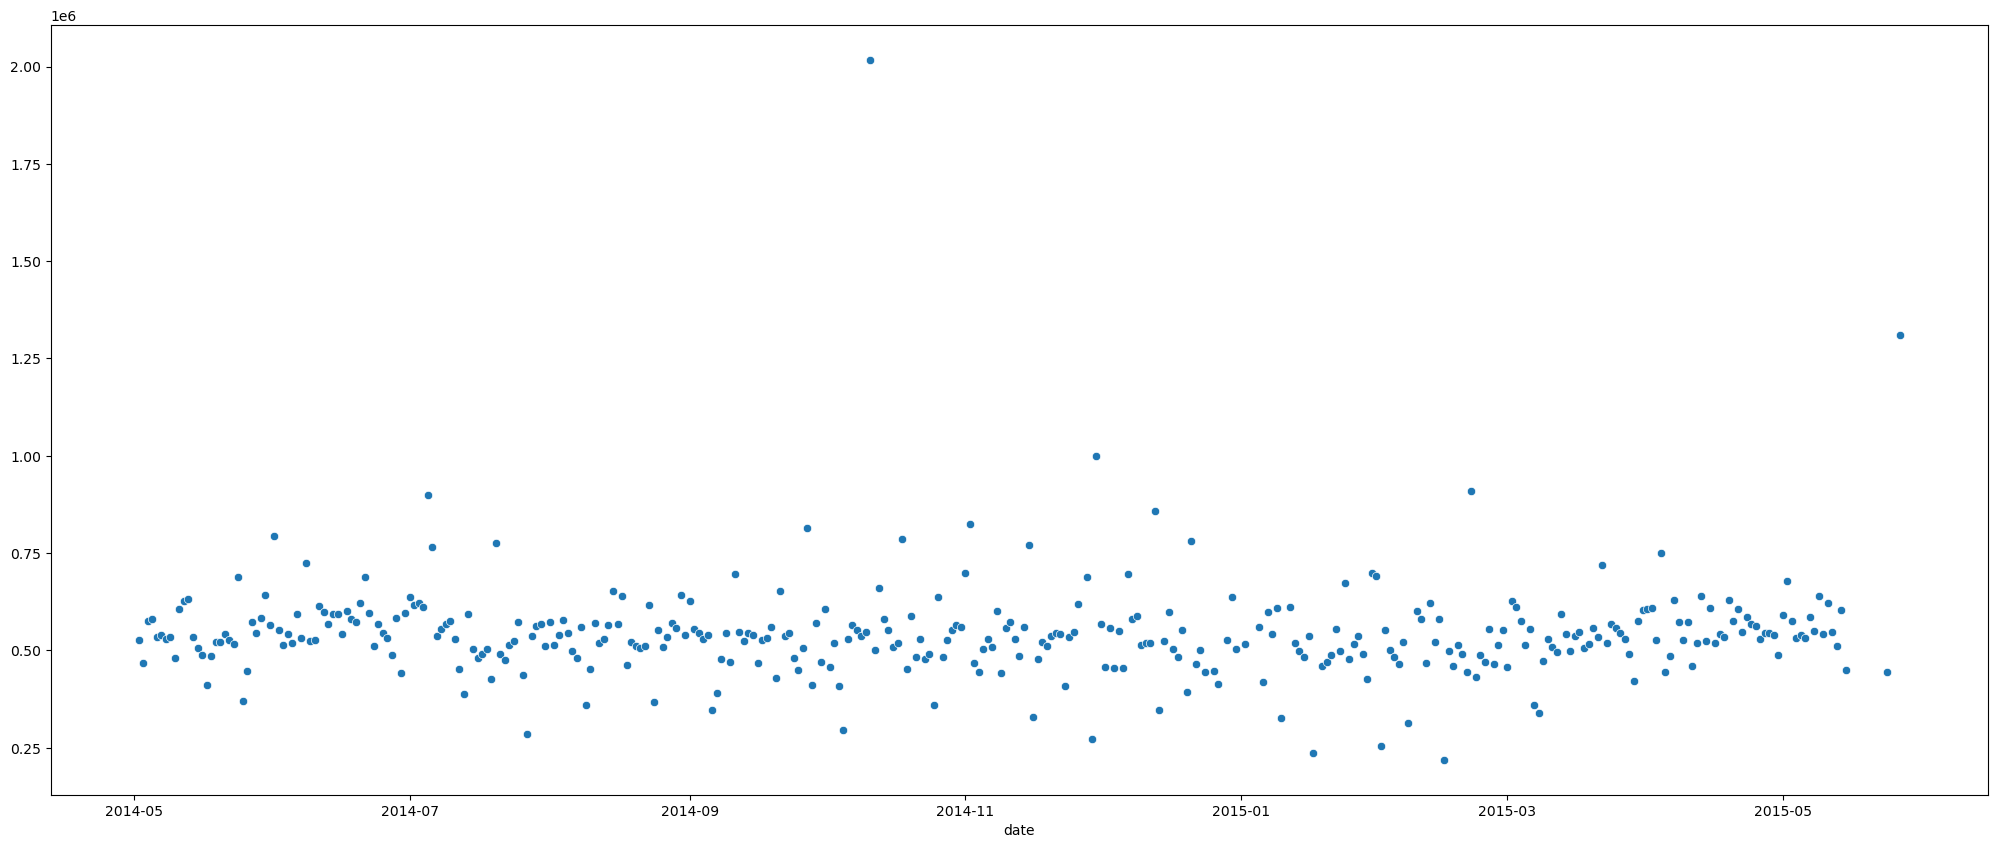

In [173]:
ref_time = df.groupby(["date"]).mean()
x = ref_time.index
y = ref_time.price.values
plt.figure(figsize=(25,10))
sns.scatterplot(x, y)
plt.show()

#### Para identificar um bom momento para venda podemos olhar para o mercado de dos estados unidos baseado na taxa de juros atualmente, pois bons momentos de venda de imóveis são facilitados quando a taxa de juros da economia está sob baixa já que o crédito imobilário fica mais barato


<Figure size 3000x500 with 0 Axes>

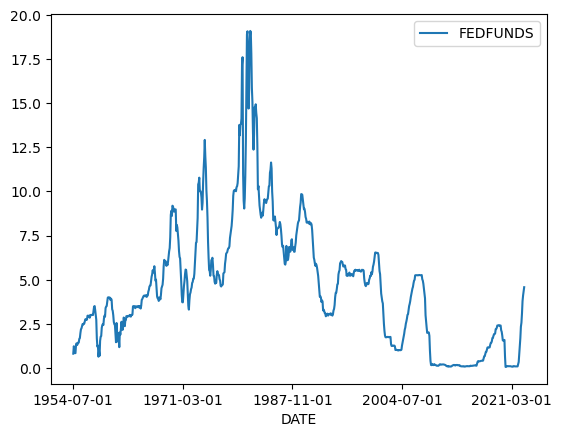

In [174]:
# Lendo dados de Fundos dos EUA
plt.figure(figsize=(30,5))
usa_tax  =pd.read_csv("House_Prices\FEDFUNDS.csv")
usa_tax.set_index("DATE",inplace = True)
usa_tax.plot()
plt.show()

#### Veja que houve um baixa no período de venda do conjunto de dados que está entre os períodos de 2004 - 2021 após isso há uma tendência a subida da taxa isto é, seria então para os próximo meses uma boa ideia vender já que no período do conjunto estava em uma baixa da Taxa FED

#### Agora note que dado o período atual e trazendo os preçs para o período atual supondo que os imóveis nãoo teriam tanta variação nos preços, seria uma tendência já pensar em vender no preço baseado no conjunto de bons imóveis antes que estes se desvalorizem mais devido a alta da taxa de juros

In [175]:
import numpy as np

ref_time['Time'] = np.arange(len(ref_time.index))

ref_time.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Time
date,,,,,,,,,,,,,,,,,,,,,
2014-05-02,4.088342e+09,526251.492537,3.402985,2.000000,2102.835821,15640.477612,1.462687,0.0,0.223881,3.447761,...,1819.850746,282.985075,1972.850746,29.761194,98075.402985,47.570193,-122.183612,2068.358209,15771.328358,0
2014-05-03,6.709662e+09,466970.000000,3.000000,1.750000,1620.000000,8901.000000,1.250000,0.0,0.000000,3.500000,...,1490.000000,130.000000,1978.750000,0.000000,98067.000000,47.548425,-122.079750,1910.000000,27967.500000,1
2014-05-04,5.848658e+09,576690.000000,3.200000,2.000000,2508.000000,7563.000000,1.400000,0.0,0.400000,3.400000,...,1878.000000,630.000000,1972.400000,0.000000,98089.400000,47.525660,-122.196200,2265.000000,7438.800000,2
2014-05-05,4.571210e+09,580938.607143,3.523810,2.119048,2257.845238,17966.309524,1.565476,0.0,0.202381,3.440476,...,1887.607143,370.238095,1972.857143,141.988095,98079.773810,47.593731,-122.205560,2035.726190,13471.428571,3
2014-05-06,4.553568e+09,534047.903614,3.493976,2.108434,2102.168675,12127.662651,1.457831,0.0,0.120482,3.349398,...,1769.638554,332.530120,1969.108434,193.373494,98080.481928,47.597886,-122.237205,1974.349398,10881.469880,4


In [176]:
ref_time['Lag'] = ref_time ['price'].shift(1)
ref_time = ref_time.reindex(columns=['price', 'Lag'])

In [177]:
ref_time.price

date
2014-05-02    5.262515e+05
2014-05-03    4.669700e+05
2014-05-04    5.766900e+05
2014-05-05    5.809386e+05
2014-05-06    5.340479e+05
                  ...     
2015-05-13    5.116239e+05
2015-05-14    6.034363e+05
2015-05-15    4.500000e+05
2015-05-24    4.455000e+05
2015-05-27    1.310000e+06
Name: price, Length: 372, dtype: float64

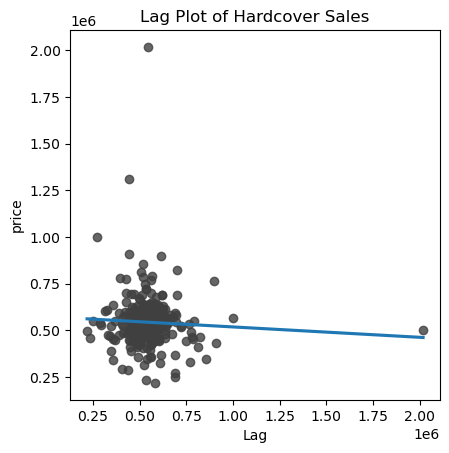

In [178]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag', y='price', data=ref_time, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales');

### Segundo o gráfico não podemos de fato prever uma linha de tendência bem evidente já que os dados estão agrupados, logo e a linha que relaciona os preços está sendo enviesada pelos valores outliers. Porém, podemos descrever e e olhar para a métrica de dias do mês

<AxesSubplot:>

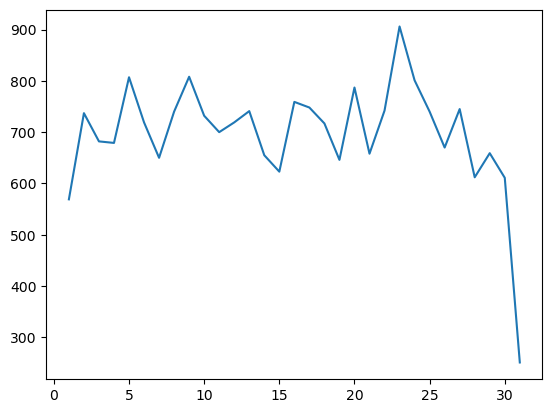

In [179]:
df.date.dt.day.value_counts().sort_index().plot()

### Veja que existe um volume de vendas mais alto entre os dias 20 e 25 (apesar de não ser totalmente verdade, podemos assumir por enquanto que isso seja um boa métrica de momento de venda)

## Definindo o preço de venda do imóvel

In [180]:
df_model = outliers.sort_values('price').drop(columns = ['price','date'])

In [181]:
df_model

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3103,6613000015,4,3,3180,4649,2.0,0,0,4,9,2070,1110,1925,0,98105,47.6583,-122.273,2720,5980
20729,3758900023,4,3,3810,8519,1.0,0,1,3,10,2680,1130,2007,0,98033,47.6990,-122.207,3240,10748
11037,3860400060,4,2,2660,11200,2.0,0,0,3,9,2660,0,1999,0,98004,47.5894,-122.197,3290,11275
11927,3528000310,5,2,4310,28008,2.0,0,0,3,10,4310,0,1988,0,98053,47.6662,-122.056,3170,28559
4623,2581900165,4,4,4300,8406,2.0,0,1,3,11,3580,720,1987,0,98040,47.5396,-122.214,2770,10006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,8907500070,5,5,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
4411,2470100110,5,6,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
9254,9208900037,6,8,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3914,9808700762,5,4,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449


In [182]:
# Agora podemos esperar de fato acertar com mais precisão as regiões podemos construir um modelo de regressão linear em torno
# dos valores outliers para conseguir estimar o lucro dos conjunto de bons imóveis baseado nesse modelo.
Y = outliers.loc[:, 'price'].values
X = df_model.iloc[:, :-1].values

18

In [183]:
df_normal = df.sort_values('price').drop(columns = ['price','date'])
Y_normal = df.loc[:, 'price'].values
X_normal = df_normal.iloc[:,:-1].values

In [184]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.7, random_state = 0)

In [185]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,Y)

LinearRegression()

In [186]:
y_pred = regressor.predict(X_normal[0:803])
np.set_printoptions(precision=2)
graf = np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1)

In [199]:
X_normal[0:803][0]

array([ 3.42e+09,  1.00e+00,  1.00e+00,  6.70e+02,  4.34e+04,  1.00e+00,
        0.00e+00,  0.00e+00,  3.00e+00,  3.00e+00,  6.70e+02,  0.00e+00,
        1.97e+03,  0.00e+00,  9.80e+04,  4.73e+01, -1.22e+02,  1.16e+03])

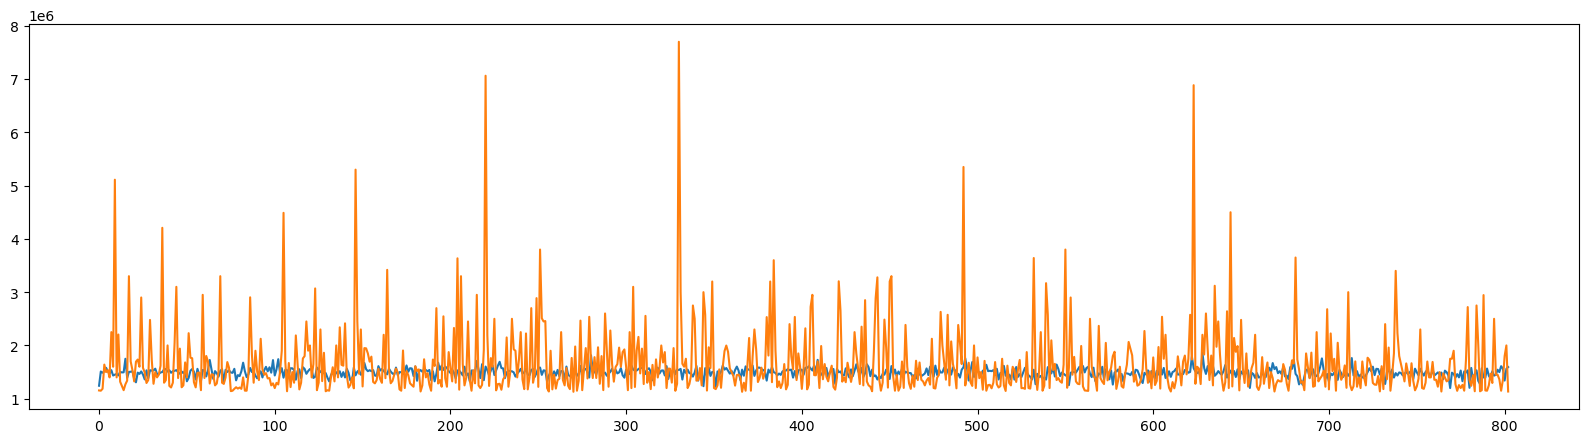

In [187]:
plt.figure(figsize=(20,5))
plt.plot(graf)
plt.show()

In [188]:
print("Valor médio de lucro do conjunto de dados: R$",round(np.diff(graf).mean(),2))

Valor médio de lucro do conjunto de dados: R$ 168937.91


In [189]:
print("Valor média dos preços dos bons imóveis: R$",round(np.mean(graf),2))

Valor média dos preços dos bons imóveis: R$ 1576010.59


In [190]:
print("Porcentagem de lucro em cima do valor dos imóveis: ",round(np.diff(graf).mean()/np.mean(graf),2)*100,"%")

Porcentagem de lucro em cima do valor dos imóveis:  11.0 %


#### Logo, os imóveis podem ser vendidos num valor em torno de 1.576.010 reais gerando um lucro de 11% em cima do valor do de venda do produto

## O que a house rocket pode fazer para conseguir melhores resultados?

In [191]:
# Incremento de preço baseado nas reformas feitas para cada imóvel
# Exemplo o imóvel passa a ter de 2 a 3 quartos qual o incremento de valorização do imóvel?
# Qual reforma vale mais a pena fazer? (Em qual local)
# Quais tipos de reforma --> O que isso quer dizer?
# Observar tendências de movimento de mercado na região é possível?
# Observar transações é possível, para identificar potenciais clientes? E fazer um estudo de mercado para conseguir segmentar
# os o público que tem mais chance de comprar o imóvel? (será possível?)

#### Podemos, por exemplo tomar um preço de reforma de apartarmentos com 1 quarto do conjunto e colocá-los sobre a perspectiva de aumento de quartos e banheiros no modelo de machine learning para tentar prever de quanto é o incremento para o conjunto todo

In [192]:
imoveis_reforma = df.query("bedrooms<2 and bathrooms<2")
imoveis_reforma

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
154,7920100045,2014-05-16,350000.0,1,1,700,5100,1.0,0,0,...,7,700,0,1942,0,98115,47.6790,-122.300,1010,5100
264,2123039032,2014-10-27,369900.0,1,1,760,10079,1.0,1,4,...,5,760,0,1936,0,98070,47.4683,-122.438,1230,14267
350,7325600160,2014-06-04,299000.0,1,1,560,12120,1.0,0,0,...,4,560,0,1967,0,98014,47.6750,-121.854,1300,19207
465,8658300340,2014-05-23,80000.0,1,1,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
648,922049078,2014-11-18,157000.0,1,1,870,26326,1.0,0,0,...,6,870,0,1939,0,98198,47.4152,-122.300,1250,10608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20853,1523300140,2014-09-04,325000.0,1,1,730,1942,1.0,0,0,...,7,730,0,2009,0,98144,47.5943,-122.299,1020,2044
21043,9276200220,2014-07-17,375000.0,1,1,720,3166,1.0,0,0,...,6,720,0,1920,0,98116,47.5811,-122.389,1140,6250
21326,6003000851,2014-05-22,353000.0,1,1,550,1279,2.0,0,0,...,7,550,0,2008,0,98122,47.6160,-122.314,1460,1385
21332,9266700190,2015-05-11,245000.0,1,1,390,2000,1.0,0,0,...,6,390,0,1920,0,98103,47.6938,-122.347,1340,5100


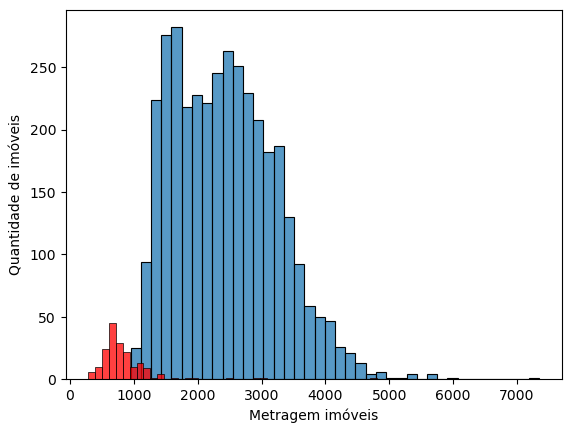

In [193]:
sns.histplot(imovel_bom.sqft_living)
sns.histplot(imoveis_reforma.sqft_living,color = 'red')
plt.xlabel('Metragem imóveis')
plt.ylabel('Quantidade de imóveis')
plt.show()

In [194]:
print('Quantidade de média de quartos: ',round(imovel_bom.bedrooms.mean()))
print('Quantidade de média de banheiros: ',round(imovel_bom.bathrooms.mean()))
print('Quantidade de média de metragem: ', round(imovel_bom.sqft_living.mean()))

Quantidade de média de quartos:  4
Quantidade de média de banheiros:  2
Quantidade de média de metragem:  2422


### Baseado nas quantidades médias principais teriámos que estimar quanto o valor do imóvel aumentará se houver a reforma, baseado na estimativa do modelo vejamos quanto aumenta o valor de precificação

#### Nesse caso basta que estimemos (com base no modelo de regressão linear múltipla o preço médio dos imóveis) e tomemos para ver qual será a diferença(lucro esperado com base nas mudanças das 3 variáveis - quartos, banheiros e área)

In [195]:
bons_precos = imovel_bom.drop(columns = ['price','date'])

In [204]:
valor_bons = regressor.predict(bons_precos.iloc[:,:-1])

C:\Users\jgbm1\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [215]:
print("Preço médio do conjunto de imóveis bons R$",str(round(valor_bons.mean())))

Preço médio do conjunto de imóveis bons R$ 1586464


In [217]:
reforma_precos = imoveis_reforma.drop(columns = ['price','date'])

In [218]:
valor_reforma = regressor.predict(reforma_precos.iloc[:,:-1])

C:\Users\jgbm1\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [222]:
print("Preço médio do conjunto de imóveis bons R$",str(round(valor_reforma.mean())))

Preço médio do conjunto de imóveis bons R$ 1556922


In [223]:
# Logo se tomarmos como base o lucro de reforma médio para cada casa será 

In [231]:
lucro = valor_bons.mean() - valor_reforma.mean()
print('Valor de lucro médio para cada imóvel R$',round(lucro))
print('''Se estendermos isso para a quantidade de imóveis que temos no conjunto de reforma e estimando que o custo serão\ncerca de 50% do valor de reforma segue que:\n O valor médio de lucro por imóvel é: (29541/2)*(Qtde de imóveis p/reforma) = ''', 29541*0.5*len(imoveis_reforma))

Valor de lucro médio para cada imóvel R$ 29541
Se estendermos isso para a quantidade de imóveis que temos no conjunto de reforma e estimando que o custo serão
cerca de 50% do valor de reforma segue que:
 O valor médio de lucro por imóvel é: (29541/2)*(Qtde de imóveis p/reforma) =  2658690.0


## Isto é tem-se um lucro de cerca de 2,6 milhões em cima das reformas feitas caso este processo de reforma seja feito, então é possível ter um aumento de receita considerável baseado na reforma dos quartos, banheiros e a metragem dos imóveis menores

# Conclusão

### Baseado nas perguntas que nortearam o problema de negócio exposto, posso concluir que tal projeto pode por meio das técnicas isadas gerar valor para empresas e setores que optarem por uso de tais meios para nortear suas decisões e atitudes por meio da história que os dados contam.